# Exercise One - The Book Class (2%)
## TASK1 - class Book
#here defining class Book with instance variables title, author, year, genres
#using constructor, __init__ method for that;
#then initialising __str__ method responsible for printing out stuff; I create one long string with string and variables included.

In [1]:
class Book:
    def __init__(self, title: str, author: str, year: int, genres: list):
        self.title=title
        self.author=author
        self.year=year
        self.genres=genres

    def __str__ (self): #user friendly format
        s = (f"Title: {self.title}, Author: {self.author}, Year: {self.year}, Genres: {self.genres}")
        return s
    
    #task 2 of ex1
    def __string_for_txt__(self):
        string_genres = ', '.join(self.genres)
        r = f"{self.title}, {self.author}, {self.year}, [{string_genres}]"
        return r

    #I didn't need it for the whole task except EXERCISE 2 - TASK3 and EXERCISE 3 - TASK 4 when printed list in the end
    def __repr__(self):
        return (f"Title: {self.title}, Author: {self.author}, Year: {self.year}, Genres: {self.genres}")

#here I will create 3 objects of Book class and try to print them accordingly

#number -380 is just a way do display year 380 BD (before our era)

#It worked.The output was:

#Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']

#Title: Allegory of the cave, Author: Plato, Year: -380, Genres: ['Philosophy', 'Political Theory', 'Epistemology']

#Title: Beyond Good and Evil, Author: Friedrich Nietzsche, Year: 1886,Genres: ['Philosophy', 'Ethics']

About creating method to convert:
#I first wrote it like this: 
r = self.title, self.author, self.year, self.genres
#but got mistake - returned a tuple; so had to rewrite it like this (make sure it is a string):
r = f"{self.title}, {self.author}, {self.year}, " + {self.genres}
#it worked but still had ' ' around self.genre elements.
#To remove it used join method:
#string_genres = ', '.join(self.genres)
created new variable, then join method takes all elements from list self.genres and puts them in a string separated by space and comma; single quoation marks disappear bcz they exist only for list representation; when it's string there is no single quotation marks. stored in variable string_genres



In [2]:
book1 = Book ('Meditations', 'Marcus Aurelius', 161, ['Philosophy', 'Stoicism'])
book2 = Book ('Allegory of the cave', 'Plato', -380, ['Philosophy', 'Political Theory', 'Epistemology'])
book3 = Book ('Beyond Good and Evil', 'Friedrich Nietzsche', 1886, ['Philosophy', 'Ethics'])
print(book1)
print(book2)
print(book3)
print(book1.__string_for_txt__()) #this trying to use method which I created to convert format to the one needed for txt.

Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']
Title: Allegory of the cave, Author: Plato, Year: -380, Genres: ['Philosophy', 'Political Theory', 'Epistemology']
Title: Beyond Good and Evil, Author: Friedrich Nietzsche, Year: 1886, Genres: ['Philosophy', 'Ethics']
Meditations, Marcus Aurelius, 161, [Philosophy, Stoicism]


## TASK2 - load_from_file_line(line)
#I will first create list of objects and write them to file and then do method, I find this way easier

In [3]:
#To create list of 5+books: I have 3 objects already, will first create 7 more objects(so will be 10):
book4 = Book('Nicomachean Ethics', 'Aristotle', -350, ['Philosophy', 'Ethics'])
book5 = Book('The Tao Te Ching', 'Laozi', -600, ['Philosophy', 'Spirituality'])
book6 = Book('Critique of Pure Reason', 'Immanuel Kant', 1781, ['Philosophy', 'Epistemology', 'Metaphysics'])
book7 = Book('The Myth of Sisyphus', 'Albert Camus', 1942, ['Philosophy', 'Existentialism'])
book8 = Book('Discourse on Method', 'René Descartes', 1637, ['Philosophy', 'Epistemology'])
book9 = Book('The Social Contract', 'Jean-Jacques Rousseau', 1762, ['Political Theory'])
book10 = Book('Thus Spoke Zarathustra', 'Friedrich Nietzsche', 1883, ['Philosophy', 'Existentialism'])

#create a list of the book objects
book_list=[]
book_list.extend ([book1, book2, book3, book4, book5, book6, book7, book8, book9, book10])
#if i print it now makes no sense(i tried). only returns address of all this objects in memory

#now need to write them into a file
with open ("philosophy_books.txt", "w") as file:
    for book in book_list:
        file.write(book.__string_for_txt__() +"\n")
#Yes, it wrote data correctly this time.

Notes:

with open ("philosophy_books.txt", "w") as file: 
#opens txt file in a writing mode; files doesn't exist yet, so will create it. in future just opens in w mode.(CAREFUL - OVERWRITES!)
    for book in book_list: 
#this line iterates over each item (object) in book_list
        file.write(str(book)+"\n") 
#this line writes to txt file what i need (book objects), BUT it converst them to string first, because now it will write just an adress in memory.(as i tried when printed it)
        
#I tried writing them and it worked, but also included extra stuff like when printing "Title:, Genre:" etc. That's because it goes through the __str__ method. I needed to find a way to avoid that.

#my solution was to define another method in class called   def __string_for_txt__(self) which would convert to the format needed. and then when writing apply this method first.

***Defining method load_from_file_line***

In [4]:
def load_from_file_line(line):
    #split line to parts (Name, Author, Year by comma; only 3 commas until Genre)
    parts = line.split(', ', 3)
    
    title = parts[0] #first element in string is title
    author = parts[1] #second element in string is author
    year = parts[2] #third element in string is year
    year = int(year) #it was integer so convert it back to INT

    genres_part = parts[3].strip('[]') #remove brackets from genres part 
    genres = genres_part.split(', ') # split with commas to smaller parts

    return Book(title, author, year, genres) #returns an object of class Book with attributes : title, author, year, genres

#If I understood it correctly this method doesn't need to open and read the file like: with open("philosophy_books", "r") as file and then go line by line. It's I give it a line and it works with it.Just a single line at a time

In [5]:
#here I will call the method to check if it works:
line = "Meditations, Marcus Aurelius, 161, [Philosophy, Stoicism]"
new_book = load_from_file_line(line)
print(new_book)

Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']


#Yes, it works. 
So, the way it works in my code: 
1) Method __string_for_txt__ to transform object data from user friendly format like 
"Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']" . 

 to concise format like:
 Meditations, Marcus Aurelius, 161, [Philosophy, Stoicism]

 which is stored in txt file. 
 OBJECT -> STRING in txt

 2) after it is stored, using another method  - load_from_file_line(line) to unpack it by the line given by user and return as an object (so it can be printed again in a user-friendly format) 
 STRING in txt -> OBJECT


# Exercise Two - The Library Class (3%)
## TASK1
# class Library
# add_book(book)
# load_books_from_file(filename)
# save_books_to_file(filename)

In [6]:
#EXERCISE 2 - TASK1
class Library:
    def __init__(self):
        self.BOOKS = [] #empty list which will store Book objects
        #BOOKS is a new list so I called it different than the one I had before - book_list with 10 philosophy books

    def add_book(self, book): #method to add Book objects to list
        #make sure no duplicates
        if not any(existing_book.title == book.title and existing_book.author == book.author for existing_book in self.BOOKS):
            self.BOOKS.append(book)
         #so if I call this method later e.g. like library.add_book(book1) - it would add object of class Book (in my case "Meditations, Markus Aurelius...") to an object library of class Library.

    def load_books_from_file (self, filename):
        with open (filename, "r") as file: #similar to Ex1, no need explain
            for line in file:
                book = load_from_file_line(line.strip()) 
                #book object before a was a line that was read.
                
                #method to convert lines(strings) in txt to object format defined before and is called load_from_file_line, so just using it here again.
                # what it does: converts from technical format in txt  again to user-friendly fromat in list.

                # strip - remove extra spaces and newline charaters; why still need to strip, even though method is defined above, is bcz to handle unexpected situations if there are still some spaces/newline characters
                
                self.add_book(book) #this calls add_book method defined above which adds book object to self.BOOKS list
    
    def save_books_to_file (self, filename):
        #I actually did it in EX1 - task 2 so I guess can just use this code;
        with open (filename, "w") as file:
            for book in self.BOOKS: #list is called self.BOOKS
                file.write(book.__string_for_txt__() + "\n") #I use my method __string_for_txt__ that I defined in first code cell to convert OBJECT->string for txt.
    
    #EXERCISE 2 - TASK2
    def remove_book_by_title(self, title):
        for book in self.BOOKS:
            if book.title == title: #check if title is True, if it is as asked
                self.BOOKS.remove(book) #removes from list this book

    def update_book(self, title, new_author=None, new_year=None, new_genres=None):
    #stated None bcz it's better for default parameter. In case user provides nothing and it is not None by default will be mistake; 
    #also user will always need provide values for all parameters (new_author, new_year, new_genres), even if they only want to update some of them.
        for book in self.BOOKS:
            if book.title == title:
                if new_author is not None:
                    book.author = new_author
                if new_year is not None:
                    book.year = new_year
                if new_genres is not None:
                    book.genres = new_genres #IT IS A LIST

    #EXERCISE 2 - TASK3
    def find_books(self, title=None, author=None, year=None, genres=None): #by default no parameter provided
        
        match_the_query=[] #list to store all matched
        
        for book in self.BOOKS: #goes through main list in Library
            matching = True #start assuming all true; if at least one parameter is not rue then False

            if title is not None:
                if book.title != title:
                    matching = False
            
            if author is not None:
                if book.author != author:
                    matching = False
            
            if year is not None:
                if book.year != year:
                    matching = False
            
            if genres is not None:
                #for each genre(item) in genres(argument of this method) list 
                matching_genre = False
                for genre in genres:
                    if genre in book.genres: #so if this item is in original list genres (original means object of class Book)
                        matching_genre = True
                        break #match is found so break loop
                if not matching_genre: #match not found, treat same as parameters before - matching False.
                    matching = False
            
            #it is treated differently than other paramentres, because it is a LIST! so to check it iterates over a list (for genre in genres)

            #GENRE- ONLY 1 out of all need to match; not all

            if matching == True: #if all parameters match add this book to empty list
                match_the_query.append(book)

        if match_the_query: #LIST IS NOT EMPTY - then print it (user-friendly format)
            print(f"Books that match the query:")
            for book in match_the_query:
                print(repr(book)) #here also need REPR , othervise empty list is given in addition (LISTS need REPR)
            print() #empty line for clarity

        else:
            print("No books match the query.")
            print() #empty line for clarity

        # REMOVED - return match_the_query (prints extra empty list)
    
    #EXERCISE 3  - TASK 1
    def get_book_counts_by_author(self):
        counts_by_author_dictionary = {} # empty dictionary to store author names and count of books
        for book in self.BOOKS: #go by each book (item in list self.BOOKS in Library)
            # if the author(KEY) is already in the dictionary, count +1
            if book.author in counts_by_author_dictionary: #book.author means attribute author of object book; 
                counts_by_author_dictionary[book.author] += 1
            else:
                # if the author is not in the dictionary, add it with count 1; assign 1 to key (Markus Aurelius for example)
                counts_by_author_dictionary[book.author] = 1

        return counts_by_author_dictionary
    
    #EXERCISE 3 - TASK 2 (Matplotlib in cell below)

    #EXERCISE 3 - TASK 3
    def find_most_published_author(self):
        # MAKE a dictionary, put all authors as keys, number of books as values; Compare and Find the biggest value and which key (author matching it)


        #similar way to EX3 TASK1 - dictionary; to keep track of how many books each author has
        number_BooksAuthor = {}
        
        #basically same as in EX3 TASK1
        for book in self.BOOKS: #going line by line; 
            if book.author in number_BooksAuthor: #book.author is KEY; if author in dictionary? :
                number_BooksAuthor[book.author] += 1 #value +1
            else:
                number_BooksAuthor[book.author] = 1 #value 1

        #author with the most books (get value numbers out of each key in dict and return maximum value; that is how many books most published author written)
        most_published_author = max(number_BooksAuthor, key=number_BooksAuthor.get) 
        #take dictionary; 
        # use method MAX which returns maximum of values;
        # to MAX I need to provide value, now it's just a dictionary
        # "key" - tells MAX to compares VALUES instead of just keys
        # .get is a dictionary method which helps to get VALUE assosiated with a KEY in DICTIONARY
        # so gets numbers basically, compares them, returns maximum number

        #THESE are his books
        #all books written by author
        Titles_of_BooksAuthor = []
        for book in self.BOOKS:
            if book.author == most_published_author:
                Titles_of_BooksAuthor.append(book.title)  #in that case - add book title to the list

        #printing part
        print ("********")
        print(f"Most published author is {most_published_author}")
        print ("********")
        print() #empty line for clarity
        print ("********")
        print("Titles of all books by that author:")
        print ("********")
        print() #empty line for clarity
        for title in Titles_of_BooksAuthor: #prints out of list
            print (title)

        return most_published_author, Titles_of_BooksAuthor
    
    #EXERCISE 3 - TASK 4 and 5

    def suggest_similar_books(self, book_name):
        #first find the searched book object, the one matching book_name (argument)

        Book_obj_toSearch = None #need to set default value; othervise if library is empty or book not found can cause an ERROR
        for book in self.BOOKS:  #go through all books
            
            if book.title == book_name:  #check if title matches
                Book_obj_toSearch = book
                break  #stop searching once found

        if Book_obj_toSearch is None: #if no book matching ARGUMENT is found, show a message and stop
            print(f"Searched book '{book_name}' is not found")
            return #to avoid errors with None;

        ###WAS BEFORE IN TASK 4
        #to give suggestions on similar, need to find all possible matches
        MatchingAuthors_list = []  #books by the same author
        MatchingGenres_list = []  #books with at least one matching genre

        #NOW IN TASK 5 changed this:
        #list to store suggestions and number of matching genres
        #SUGGESTIONS = []

        #go through each book object to find matches
        for book in self.BOOKS:
            
            if book.title == Book_obj_toSearch.title:
                continue #skip the book itself; no need to suggest it.

            
            #TASK5
            #find number of genres overlapping
                #CountGenresMatching = len(set(book.genres) & set(Book_obj_toSearch.genres))
                #if CountGenresMatching > 0: #include only books with at least one matching genre
                    #SUGGESTIONS.append((book, CountGenresMatching))

        #TASK5
        #sort by number of matching genres and then alphabetically by title
        #SUGGESTIONS_sorted = sorted(SUGGESTIONS, key=lambda i: (-i[1], i[0].title))

        #TASK5
        #remove duplicates
        #unique_suggestions = []
        #seen_titles = set()
        #for suggestion, count in SUGGESTIONS_sorted:
            #if suggestion.title not in seen_titles:
                #unique_suggestions.append((suggestion, count))
                #seen_titles.add(suggestion.title)

            #WAS BEFORE IN TASK 4
            #if author is matching, add book to list of matches (suggestions)
            if book.author == Book_obj_toSearch.author:
                MatchingAuthors_list.append(book)

            if set(book.genres) & set(Book_obj_toSearch.genres):  #overlap of genre sets
                MatchingGenres_list.append(book)
            

            #combine
        suggested_books_list = MatchingAuthors_list[:]
        for book in MatchingGenres_list:
            if book not in suggested_books_list:  # Avoid duplicates.
                suggested_books_list.append(book)

            #genres overlap
            #if genre is matching, add book to list of matches (suggestions)
            #for genre in Book_obj_toSearch.genres:
                #if genre in book.genres: #if the one SEARCHED GENRE is in ALL BOOKS LIST GENRE
                    #MatchingGenres_list.append(book)
                   # break  #ONLY ONE GENRE NEEDED! stop go through book object and go to next book object once found match

        #combine matches found by AUTHOR and by GENRE
        #suggested_books_list = MatchingAuthors_list # first added (assigned basically) all matches by AUTHORS
        #for book in MatchingGenres_list:  #then check not suggested twice same (author and genre can be both suit for suggestion, but need only 1)
            #if book not in suggested_books_list:  #if no duplicates
                #suggested_books_list.append(book) #then add
            

        #printing part
        if suggested_books_list:
            print ("********") #I use * and empty lines for better view
            print(f"If you liked the book '{book_name}' you may also like:")
            print() #empty line
            
            for suggestion in suggested_books_list:
                print(f"Title: {suggestion.title}, Author: {suggestion.author}, Genres: {suggestion.genres}")
            print ("********")
            
            print() #empty line
        
        else:
            print ("********")
            print (f"Unfortunately, no similar books to '{book_name}' ")
            print ("********")


In [7]:
#will check if it works here
library1 = Library() #created object library of class Library; it is also an empty list - self.BOOKS
library1.load_books_from_file("philosophy_books.txt")
#so basically load to list self.BOOKS; it also get converted to user-friendly format as defined in load_books_from_file - load_from_file_line 

for book in library1.BOOKS: #go line by line and print
    print(book)
#Yes it worked, printed all books in user friendly format like this:
# Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']


Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']
Title: Allegory of the cave, Author: Plato, Year: -380, Genres: ['Philosophy', 'Political Theory', 'Epistemology']
Title: Beyond Good and Evil, Author: Friedrich Nietzsche, Year: 1886, Genres: ['Philosophy', 'Ethics']
Title: Nicomachean Ethics, Author: Aristotle, Year: -350, Genres: ['Philosophy', 'Ethics']
Title: The Tao Te Ching, Author: Laozi, Year: -600, Genres: ['Philosophy', 'Spirituality']
Title: Critique of Pure Reason, Author: Immanuel Kant, Year: 1781, Genres: ['Philosophy', 'Epistemology', 'Metaphysics']
Title: The Myth of Sisyphus, Author: Albert Camus, Year: 1942, Genres: ['Philosophy', 'Existentialism']
Title: Discourse on Method, Author: René Descartes, Year: 1637, Genres: ['Philosophy', 'Epistemology']
Title: The Social Contract, Author: Jean-Jacques Rousseau, Year: 1762, Genres: ['Political Theory']
Title: Thus Spoke Zarathustra, Author: Friedrich Nietzsche, Year: 1883, Genres: [

In [8]:
#testing add_book method separately
library2 = Library() #I will created another "imaginable Library" object library2 which will have 2 other books 11, 12 of modern philosophy

book11 = Book('Being and Nothingness', 'Jean-Paul Sartre', 1943, ['Philosophy', 'Existentialism', 'Phenomenology'])
book12 = Book('The Structure of Scientific Revolutions', 'Thomas S. Kuhn', 1962, ['Philosophy', 'Science', 'Epistemology'])

library2.add_book(book11)
library2.add_book(book12)

for book in library2.BOOKS:
    print(book) #should print just 2 books
#Yes, it worked

Title: Being and Nothingness, Author: Jean-Paul Sartre, Year: 1943, Genres: ['Philosophy', 'Existentialism', 'Phenomenology']
Title: The Structure of Scientific Revolutions, Author: Thomas S. Kuhn, Year: 1962, Genres: ['Philosophy', 'Science', 'Epistemology']


In [9]:
#here will test save_books_to_file method separately

#at first I tried to save it but didn't work, because save_books_to_file was missing self parameter; I added it. Then I was still getting same mistake "save_books_to_file() takes 1 positional argument but 2 were given"; It turned out bcz I was running 1 cell; Once I ran the whole code it understood save_books_to_file has 2 arguments and it worked.
library2.save_books_to_file("modern_philosophy_library2.txt")
#Yes, it worked

## TASK2 - remove_book_by_title(title)

In [10]:
#here will test if it works
#test remove_book_by_title
library3 = Library()
library3.load_books_from_file("philosophy_books.txt")
print ("********") #I use * and empty lines for better view
print()
for book in library3.BOOKS:
    print(book)

library3.remove_book_by_title("The Myth of Sisyphus") #it's book 7
print ("#########")
print()
for book in library3.BOOKS:
    print(book)

#it didn't work at first because I wrote method remove_book_by_title in  another cell ,so defined method outside the class. I moved to to class Library.

#Yes it worked now; removed book 7 - The Myth of Sisyphus by title

********

Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']
Title: Allegory of the cave, Author: Plato, Year: -380, Genres: ['Philosophy', 'Political Theory', 'Epistemology']
Title: Beyond Good and Evil, Author: Friedrich Nietzsche, Year: 1886, Genres: ['Philosophy', 'Ethics']
Title: Nicomachean Ethics, Author: Aristotle, Year: -350, Genres: ['Philosophy', 'Ethics']
Title: The Tao Te Ching, Author: Laozi, Year: -600, Genres: ['Philosophy', 'Spirituality']
Title: Critique of Pure Reason, Author: Immanuel Kant, Year: 1781, Genres: ['Philosophy', 'Epistemology', 'Metaphysics']
Title: The Myth of Sisyphus, Author: Albert Camus, Year: 1942, Genres: ['Philosophy', 'Existentialism']
Title: Discourse on Method, Author: René Descartes, Year: 1637, Genres: ['Philosophy', 'Epistemology']
Title: The Social Contract, Author: Jean-Jacques Rousseau, Year: 1762, Genres: ['Political Theory']
Title: Thus Spoke Zarathustra, Author: Friedrich Nietzsche, Year: 1883,

In [11]:
#here I will test update_book ; already loaded bcz i use object library3 from previous cell
library3.update_book("Beyond Good and Evil", new_author="NOBODY", new_year=999)

print("*******") #I use * and empty lines for better view
print()
for book in library3.BOOKS:
    print(book)

#yes it worked, output Title: Beyond Good and Evil, Author: NOBODY, Year: 999, Genres: ['Philosophy', 'Ethics']


*******

Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']
Title: Allegory of the cave, Author: Plato, Year: -380, Genres: ['Philosophy', 'Political Theory', 'Epistemology']
Title: Beyond Good and Evil, Author: NOBODY, Year: 999, Genres: ['Philosophy', 'Ethics']
Title: Nicomachean Ethics, Author: Aristotle, Year: -350, Genres: ['Philosophy', 'Ethics']
Title: The Tao Te Ching, Author: Laozi, Year: -600, Genres: ['Philosophy', 'Spirituality']
Title: Critique of Pure Reason, Author: Immanuel Kant, Year: 1781, Genres: ['Philosophy', 'Epistemology', 'Metaphysics']
Title: Discourse on Method, Author: René Descartes, Year: 1637, Genres: ['Philosophy', 'Epistemology']
Title: The Social Contract, Author: Jean-Jacques Rousseau, Year: 1762, Genres: ['Political Theory']
Title: Thus Spoke Zarathustra, Author: Friedrich Nietzsche, Year: 1883, Genres: ['Philosophy', 'Existentialism']


## TASK 3 - find_books(title, author, year, genres)

In [12]:
#test method find_books here:
library4 = Library () #it's empty now

library4.add_book(book1)
library4.add_book(book2)
library4.add_book(book3) #added 3 books

library4.find_books(title="Meditations")  # search for book with the title "Meditations"

library4.find_books(year=1886)  # search for book with year 1886

library4.find_books(genres=["Philosophy"])  # search for book with genre "Philosophy"; inlcuded as element of list bcz genres is a list;

library4.find_books()  # returns all 3 books bcz I give no search parameters

library4.find_books(year=0)  # returns no books (No books match the query.), bcz no book has year 0

#library4.find_books(title=)  but if write like this will give mistake; need to specify None then.


Books that match the query:
Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']

Books that match the query:
Title: Beyond Good and Evil, Author: Friedrich Nietzsche, Year: 1886, Genres: ['Philosophy', 'Ethics']

Books that match the query:
Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']
Title: Allegory of the cave, Author: Plato, Year: -380, Genres: ['Philosophy', 'Political Theory', 'Epistemology']
Title: Beyond Good and Evil, Author: Friedrich Nietzsche, Year: 1886, Genres: ['Philosophy', 'Ethics']

Books that match the query:
Title: Meditations, Author: Marcus Aurelius, Year: 161, Genres: ['Philosophy', 'Stoicism']
Title: Allegory of the cave, Author: Plato, Year: -380, Genres: ['Philosophy', 'Political Theory', 'Epistemology']
Title: Beyond Good and Evil, Author: Friedrich Nietzsche, Year: 1886, Genres: ['Philosophy', 'Ethics']

No books match the query.



# Exercise Three - Library Analytics and Book Suggestions (5%)
#  TASK 1 - get_book_counts_by_author()

In [13]:
#testing library.get_book_counts_by_author
library5 = Library ()

library5.add_book(book1)
library5.add_book(book2)
library5.add_book(book3)
library5.add_book(book4)
library5.add_book(book5)

result = library5.get_book_counts_by_author()

print(result)

#Yes it worked. Counted how many books each author has (in this case library5 - 5 different authors and books.)

# check with original bigger library 1
result2 = library1.get_book_counts_by_author()
print(result2)
#have 'Friedrich Nietzsche': 2; works as expected

{'Marcus Aurelius': 1, 'Plato': 1, 'Friedrich Nietzsche': 1, 'Aristotle': 1, 'Laozi': 1}
{'Marcus Aurelius': 1, 'Plato': 1, 'Friedrich Nietzsche': 2, 'Aristotle': 1, 'Laozi': 1, 'Immanuel Kant': 1, 'Albert Camus': 1, 'René Descartes': 1, 'Jean-Jacques Rousseau': 1}


## TASK 2 - Matplotlib

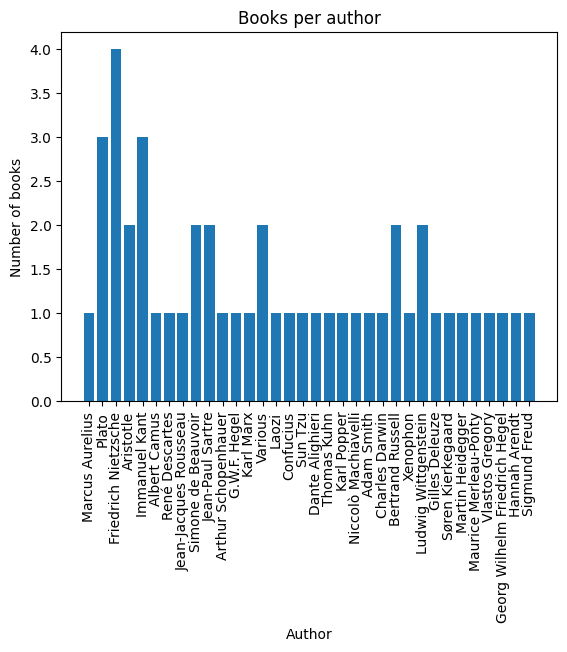

In [14]:
#I defined it ouside the Library class and it works.It uses Library objects defined in Library class above but doesn't need Library class directly

#I will use here another txt that I creted with 50 books - "50books.txt"

import matplotlib.pyplot as plt
#matplotlib - module
#pyplot - submodule
#plt - alias (short name)


BIGlibrary = Library ()
BIGlibrary.load_books_from_file ("50books.txt") #it has 50 books

author_counts = BIGlibrary.get_book_counts_by_author() #get dictionary

# take authors (keys) and book counts (values) from the dictionary
authors = list(author_counts.keys())
book_number = list(author_counts.values())

#bar chart
plt.bar (authors, book_number)

#naming axis X, Y and chart name
plt.xlabel("Author") #X
plt.ylabel("Number of books") #Y
plt.title("Books per author") #name of chart


#didn't work at first  - ModuleNotFoundError: No module named 'matplotlib'
#tried to activate environment - conda activate python_oop in BASH; still mistake
#reinstalled matplotlib
#activated environment 
#worked but presented names of authors ugly (overlapping each other)
# will rotate the x-axis 90 degrees to avoid overlap
plt.xticks(rotation=90)

plt.show() #to show
#Now worked fine

## TASK3 - find_most_published_author()

In [15]:
#testing find_most_published_author():
BIGlibrary = Library ()
BIGlibrary.load_books_from_file ("50books.txt")

#if I print it like this: "BIGlibrary.find_most_published_author()" except expected output it also prints a tuple; I don't need that; it happens because method find_most_published_author not only prints but also returns a tuple containing most_published_author and Titles_of_BooksAuthor
# to avoid that need to store them in variable

most_published_author, titles = BIGlibrary.find_most_published_author ()
#Yes, it works

********
Most published author is Friedrich Nietzsche
********

********
Titles of all books by that author:
********

Beyond Good and Evil
Thus Spoke Zarathustra
The Genealogy of Morals
On the Genealogy of Morals


## Task 4 - suggest_similar_books(book_name)

In [16]:
#testing suggest_similar_books
#use smaller library here bcz if have 50 similar books (all have philosophy genre, it gives almost all of them)
small_library = Library()
small_library.load_books_from_file ("philosophy_books.txt")
small_library.suggest_similar_books("The Social Contract")
#for small library gives only 1 book bcz it's the only one with  Political Theory genre



new_library = Library ()
new_library.load_books_from_file ("unique_books.txt")
new_library.suggest_similar_books("The Social Contract")
#for new library gives a lot of books; there are 5 with Political Theory genre (I checked), except for the searched one; 





#Yes it worked, the otput was

#********
#If you liked the book 'The Social Contract' you may also like:
#********
#Allegory of the cave by Plato (Genres: Philosophy, Political Theory, Epistemology)

#I chose this book because all of the books have Philosophy as a genre. Only this one has only "Political Theory" as genre, so it would output others with "Political Theory"; authors are almost all different;

#It worked but bcz I printed directly it also prints address in memory. I needed to use STR method to fix it

#The reason was bcz I had STR but no REPR; And lists need REPR; if no REPR, then it uses default (which is to print address). So I had to define REPR

#Yes, now no address in memory

#But now it also prints [] list (because I return suggested_books_list). I will return it as a string format then and avoid other printing

********
If you liked the book 'The Social Contract' you may also like:

Title: Allegory of the cave, Author: Plato, Genres: ['Philosophy', 'Political Theory', 'Epistemology']
********

********
If you liked the book 'The Social Contract' you may also like:

Title: Meditations, Author: Marcus Aurelius, Genres: ['Philosophy', 'Stoicism']
Title: Allegory of the cave, Author: Plato, Genres: ['Philosophy', 'Political Theory', 'Epistemology']
Title: Beyond Good and Evil, Author: Friedrich Nietzsche, Genres: ['Philosophy', 'Ethics']
Title: Nicomachean Ethics, Author: Aristotle, Genres: ['Philosophy', 'Ethics']
Title: Critique of Pure Reason, Author: Immanuel Kant, Genres: ['Philosophy', 'Epistemology', 'Metaphysics']
Title: The Myth of Sisyphus, Author: Albert Camus, Genres: ['Philosophy', 'Existentialism']
Title: Discourse on Method, Author: René Descartes, Genres: ['Philosophy', 'Epistemology']
Title: Thus Spoke Zarathustra, Author: Friedrich Nietzsche, Genres: ['Philosophy', 'Existentiali